# Section 1

### Linear Regression
Code from Section 1.1.4

In [61]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score

import warnings
warnings.filterwarnings("ignore")

In [62]:
# Prepare Data
X = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]
y = [1, 1, 1, -1, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'X_train Size: {len(X_train)}')
print(f'X_test Size: {len(X_test)}')

X_train Size: 4
X_test Size: 1


In [63]:
# Linear Regression
linreg = LinearRegression().fit(X_train, y_train)
pred_train = linreg.predict(X_train)
pred_test = np.sign(linreg.predict(X_test))

In [64]:
y_train[:10]

[1, -1, -1, 1]

In [65]:
pred_train[:10]

array([ 1.28571429, -0.42857143, -1.        ,  0.14285714])

In [66]:
# Train Results
print('Train MSE: ', '{0:.4f}'.format(mse(y_train, pred_train)))
print('Test MSE: ', '{0:.4f}'.format(mse(y_test, pred_test)))
print('Train Acc: ', '{0:.2f}'.format(100*(np.sign(pred_train)==y_train). mean()))
print('Test Acc: ', '{0:.2f}'.format(100*(np.sign(pred_test)==y_test).mean()))

Train MSE:  0.2857
Test MSE:  0.0000
Train Acc:  100.00
Test Acc:  100.00


Text(0.5, 1.0, 'y vs y hat')

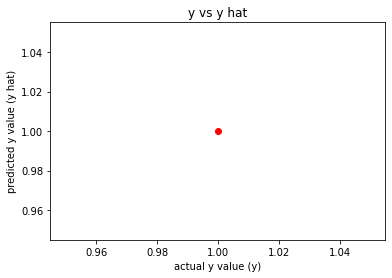

In [67]:
# Plot gold vs predicted value
plt.scatter(y_test, pred_test, c="red")
plt.xlabel("actual y value (y)")
plt.ylabel("predicted y value (y hat)")
plt.title("y vs y hat")

### SKLearn Linear Regression Example
[Link](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [68]:
# Prepare Data
data = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.2)

# Linear Regression
linreg = LinearRegression().fit(X_train, y_train)
pred_test = linreg.predict(X_test)

In [69]:
# Statistics
print("Learned Coefficients: \n", linreg.coef_)
print("Mean squared error: %.2f" % mse(y_test, pred_test))
print("Coefficient of Determination: %.2f" % r2_score(y_test, pred_test))

Learned Coefficients: 
 [ -22.36142109 -205.3743879   519.90948535  301.98361325 -754.45821425
  381.31753815   97.0460206   180.68885941  717.59531059  108.81577638]
Mean squared error: 2588.56
Coefficient of Determination: 0.52


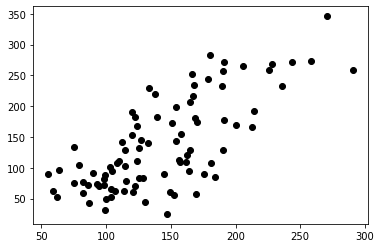

In [70]:
# Plot outputs
plt.scatter(pred_test, y_test, color="black")
plt.xticks()
plt.yticks()
plt.show()

### Gradient Descent
Code from Section 1.3.4

In [80]:
# Initialize Variables
num_iter = 50
x = np.zeros(num_iter + 1)
y = np.zeros(num_iter + 1)
x[0], y[0], eta = 7.5, 10, 0.1

# Define functions to calculate
# * f = x^2 + y^2 
# * grad_f w.r.t. x and y
def f(x, y):
    f = x**2 + y**2
    return f

def grad_f(x, y):
    dx = 2*x
    dy = 2*y
    grad_f = (dx, dy)
    return grad_f

# Run Gradient Descent
for i in range(num_iter):
    grad_x, grad_y = grad_f(x[i], y[i])
    x[i + 1] = x[i] - eta * grad_x
    y[i + 1] = y[i] - eta * grad_y

In [81]:
# Create visualization of the function `f`
xmin, xmax, ymin, ymax, n = -5, 5, -5, 5, 10
X, Y = np.meshgrid(np.linspace(xmin, xmax, n), np.linspace(ymin, ymax, n))
Z = f(X, Y)

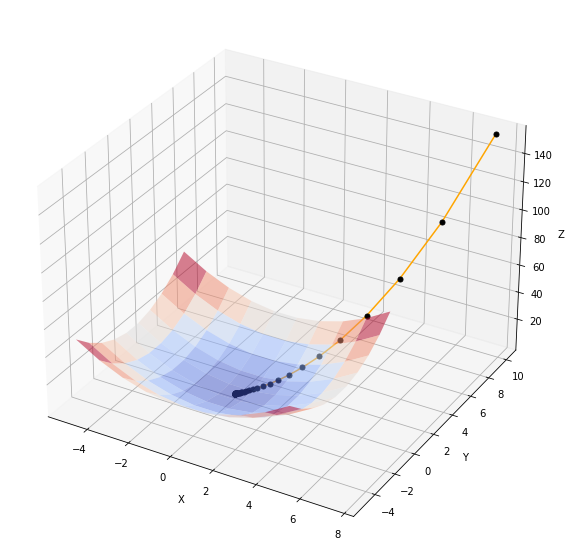

In [82]:
# Plot the function `f`
ax = plt.figure(figsize=(12, 10)).gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=ax.elev, azim=ax.azim)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.5)

# plot the trajectory of Gradient Descent
ax.plot(x, y, f(x, y), color='orange', markerfacecolor='black', markeredgecolor='k', marker='o', markersize=5);